In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리

In [5]:
# 데이터 불러오기
dead = pd.read_csv('/content/drive/MyDrive/2023_동계방학_빅데이터 활용 미래사회 문제 예측/활용 데이터/년도별 사망자 데이터/101_DT_1B34E01_20240111160629.csv', encoding='cp949')
dead.head(3)

,사망원인별(104항목),성별,연령(5세)별,시점,사망자수[명],사망률[십만명당],Unnamed: 6
0,계,계,계,2014 년,267692,527.3,NaN
1,계,계,계,2015 년,275895,541.5,NaN
2,계,계,계,2016 년,280827,549.4,NaN


In [6]:
# 필요없는 열 제거
dead = dead.drop('Unnamed: 6', axis=1)
dead.head(3)

,사망원인별(104항목),성별,연령(5세)별,시점,사망자수[명],사망률[십만명당]
0,계,계,계,2014 년,267692,527.3
1,계,계,계,2015 년,275895,541.5
2,계,계,계,2016 년,280827,549.4


In [10]:
# "사망원인별(104항목)" 열에서 "계"에 해당하는 행을 제외한 행 추출
dead_filtered = dead[dead['사망원인별(104항목)'] == '계']
dead_filtered.head(3)

,사망원인별(104항목),성별,연령(5세)별,시점,사망자수[명],사망률[십만명당]
0,계,계,계,2014 년,267692,527.3
1,계,계,계,2015 년,275895,541.5
2,계,계,계,2016 년,280827,549.4


In [8]:
dead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14040 entries, 0 to 14039
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   사망원인별(104항목)  14040 non-null  object 
 1   성별            14040 non-null  object 
 2   연령(5세)별       14040 non-null  object 
 3   시점            14040 non-null  object 
 4   사망자수[명]       14040 non-null  int64  
 5   사망률[십만명당]     10648 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 658.2+ KB


<ipython-input-17-7867b8c6b5b9>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='시점', y='사망자수[명]', data=filtered_df, marker='o', palette='viridis')


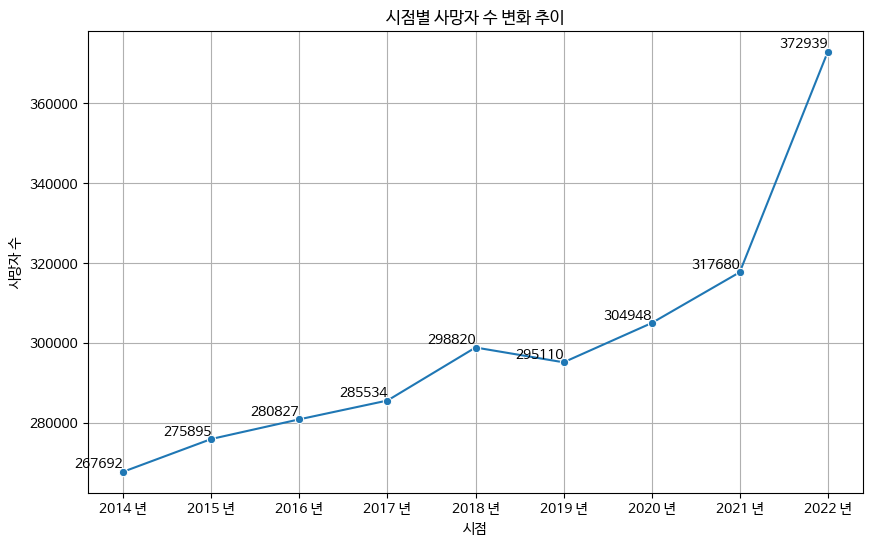

In [17]:
# 원하는 조건에 해당하는 데이터 필터링
filtered_df = dead[(dead['사망원인별(104항목)'] == '계') & (dead['성별'] == '계') & (dead['연령(5세)별'] == '계')]

plt.figure(figsize=(10, 6))
sns.lineplot(x='시점', y='사망자수[명]', data=filtered_df, marker='o', palette='viridis')

for index, value in filtered_df.iterrows():
    plt.text(value['시점'], value['사망자수[명]'], str(value['사망자수[명]']), color='black', ha="right", va="bottom")

plt.title('시점별 사망자 수 변화 추이')
plt.xlabel('시점')
plt.ylabel('사망자 수')
plt.grid(True)
plt.show()